# Connect to DB

In [1]:
import os
import psycopg2

conn = psycopg2.connect(host='localhost', port=5432, dbname='ANTT', user=os.environ["PGDBUSER"], password=os.environ["PGDBPASSWORD"])
cur = conn.cursor()

# Company counts

In [7]:
query = """
    SELECT 
        cnpj, COUNT(1) as totalTrips
    FROM
        regulartrips
    GROUP BY
        cnpj
    ORDER BY totalTrips DESC;
"""
cur.execute(query)

In [8]:
result = cur.fetchall()

In [16]:
import numpy as np

totalCompanies = len(result)
tripCounts = [entry[1] for entry in result]
tripCounts = np.asarray(tripCounts)

In [17]:
print(totalCompanies)

213


In [22]:
import pandas as pd

tripCountsDF = pd.DataFrame(tripCounts)
tripCountsDF.describe()

,0
count,213.000000
mean,32579.727700
std,69051.299984
min,11.000000
25%,1428.000000
50%,7769.000000
75%,26295.000000
max,398934.000000


# Violin plot of trips per company

[]

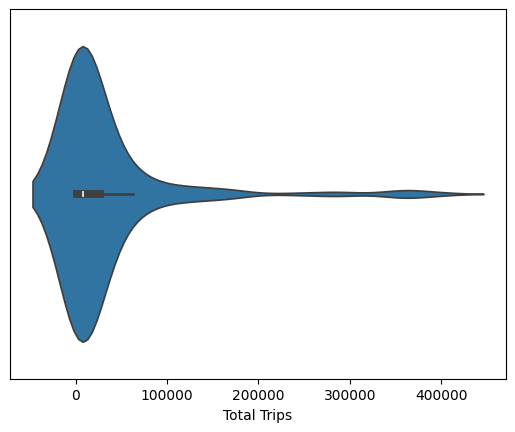

In [42]:
import seaborn as sns

boxplot = sns.violinplot(tripCountsDF, orient='h')
boxplot.set_xlabel("Total Trips")
boxplot.set_yticks([])